In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

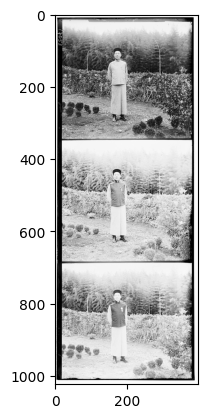

In [21]:
image = cv2.imread('asia.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray")

In [22]:
# naive split
idxs = np.linspace(0, image.shape[0], 4).astype(int)
ims = [ image[x:y] for x, y in zip(idxs, idxs[1:]) ]

In [23]:
crop = (np.array(ims[0].shape) * [.09, .08]).astype(int)
def preprocess_for_correlation(a):
    a = a[crop[0]:-crop[0], crop[1]:-crop[1]]
    return a.astype('float32')
keys = list(map(preprocess_for_correlation, ims))

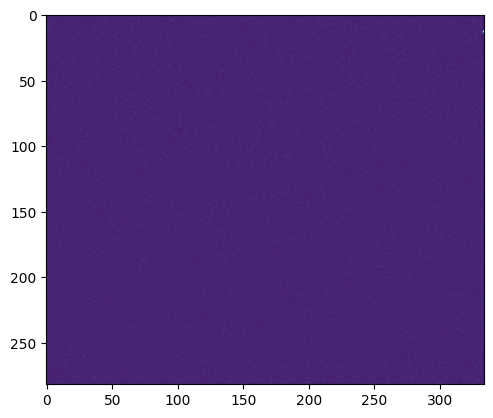

In [24]:
def get_offset(a, b):
    shape = np.maximum(a.shape, b.shape)
    convfreq = np.fft.fft2(a, shape) * np.fft.fft2(b, shape).conj()
    convfreq/= np.abs(convfreq)
    conv = np.fft.ifft2(convfreq).real
    plt.imshow(conv)
    offset = np.unravel_index(np.argmax(conv), shape)
    offset = tuple( (x + w//2) % w - w//2 for x, w in zip(offset, shape) )
    return offset
offsets = [(0, 0)] + [ get_offset(keys[0], keys[i]) for i in range(1, 3) ]

In [25]:
shapes = np.array([ im.shape for im in ims ])
bounds = np.array([np.amax(offsets, axis=0), np.amin(offsets + shapes, axis=0)])
panelbounds = ( bounds - offset for offset in offsets )
stitched = [ im[b[0][0]:b[1][0], b[0][1]:b[1][1]] for im, b in zip(ims, panelbounds) ]
stitched = np.moveaxis(stitched[::-1], 0, -1)

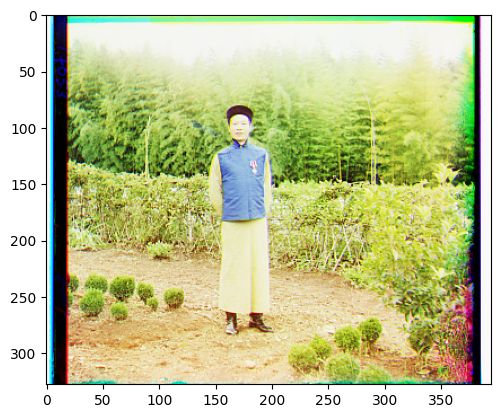

In [26]:
plt.imshow(stitched)